# Figures S11 and S12

# Packages

In [50]:
 
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob


# Asthetics

In [51]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

In [52]:
df = pd.read_csv("Figures_S11_and_S12_PlateReader.csv")

# Plate reader data

1. Replication and EDC simultaneously

2. No Asc

3. First replication, then EDC

4. No Cu

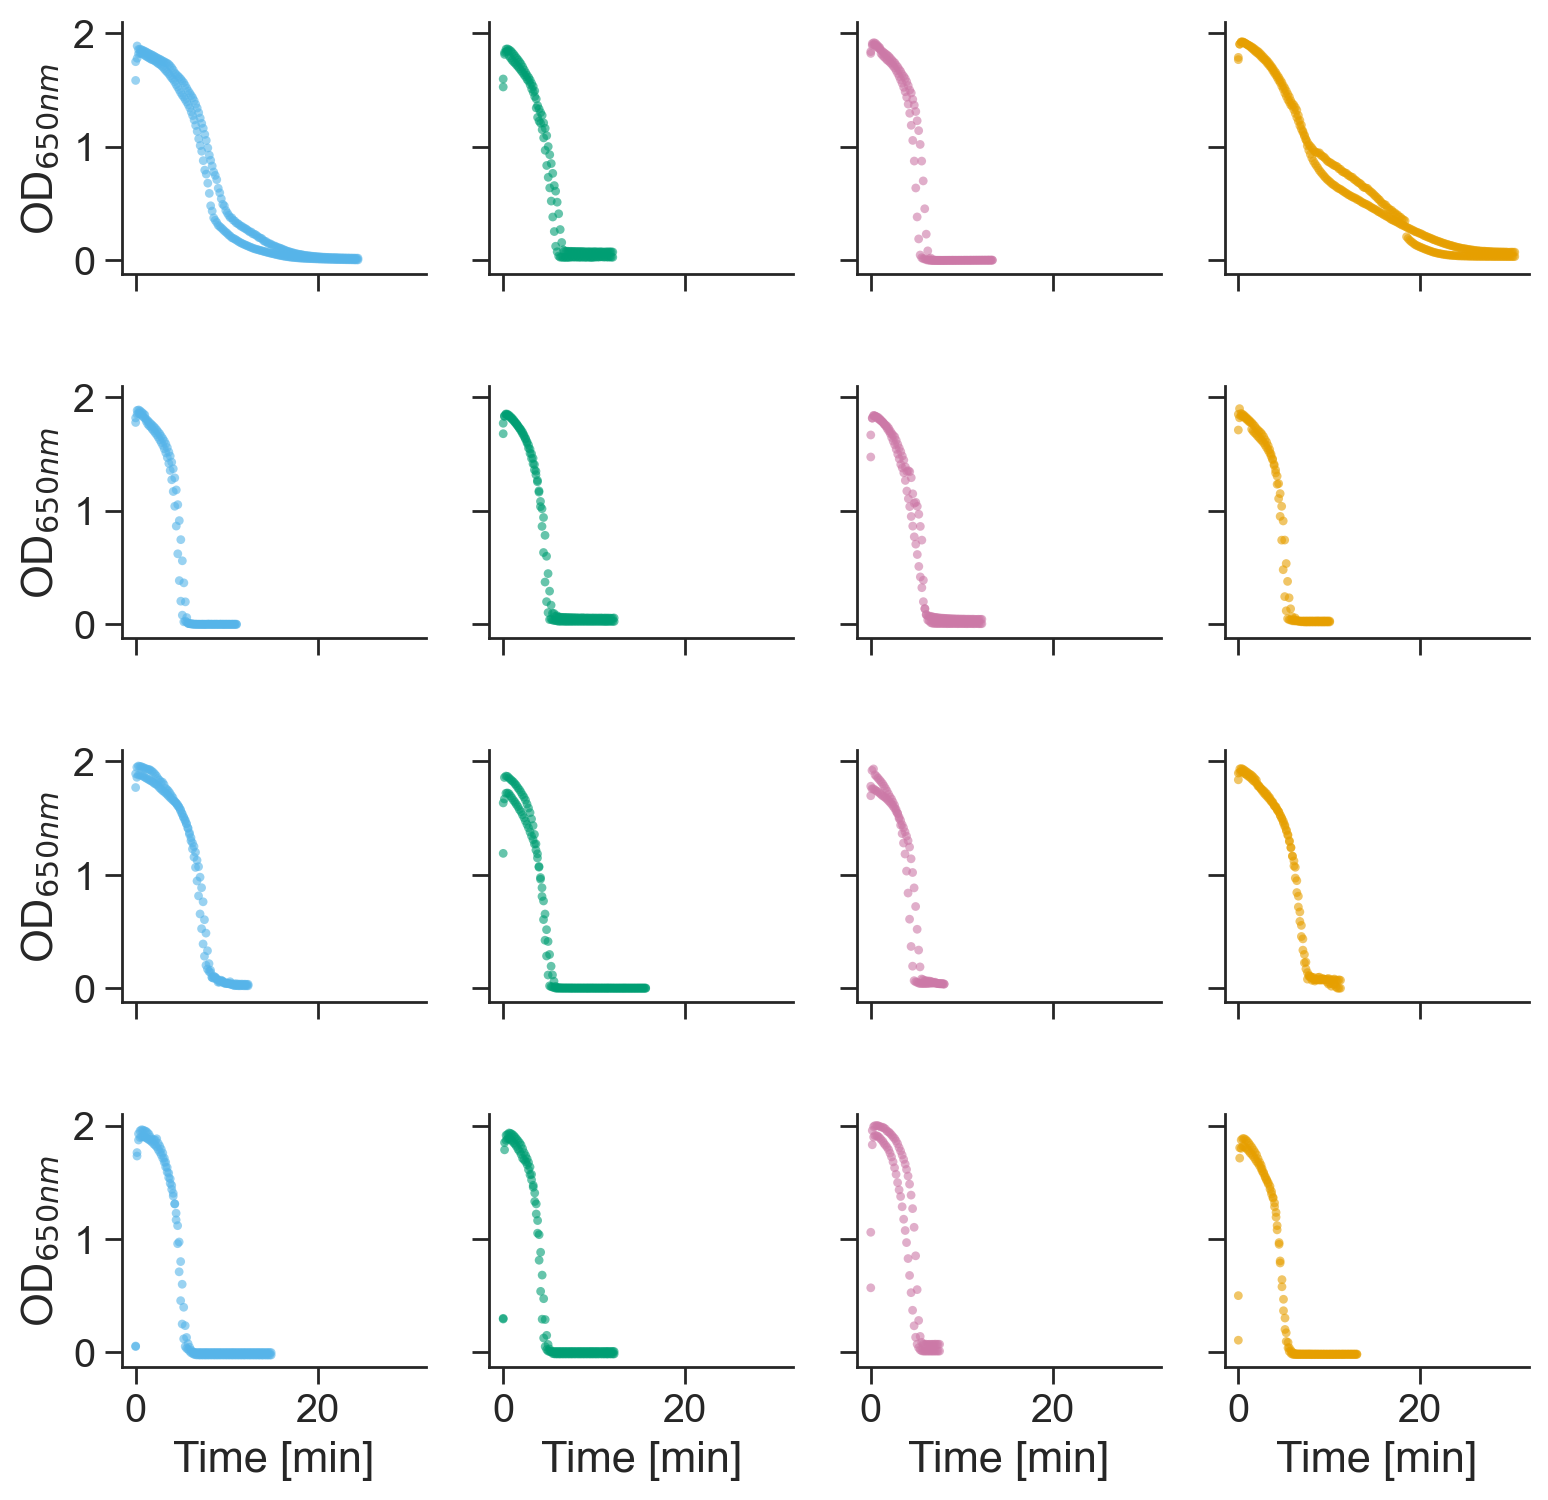

In [53]:
plt.rcParams.update({"figure.dpi": 200}) # Supporting information

p = sns.FacetGrid(data = df, col = "Azide_1", row = "Type", hue = "Azide_1" , height = 2, palette=["C0", "C1", "C2", "C4"])

p.map_dataframe(sns.scatterplot, x = "Time", y = "value", edgecolor = "none", s = 10, alpha = .6)

p.set_titles("")
p.set(xlabel="Time [min]", ylabel = "OD$_{650nm}$")


### Figure S12E

In [54]:
e = pd.read_csv("Figures_S12E.csv")


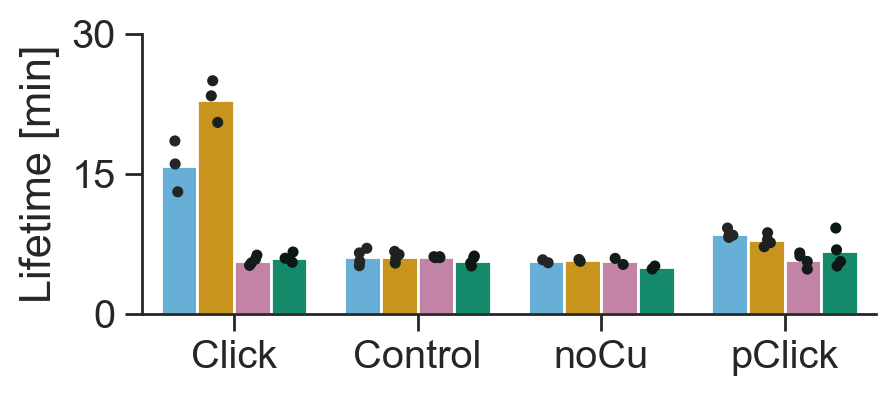

In [55]:
fig, ax = plt.subplots(figsize = (4.75,2.25), dpi = 200)

sns.stripplot(data = e.sort_values(by = ["Type", "Azide_2"]), x = "Type", y = "Lt", 
              palette='dark:#0C1713', legend=False, ax = ax, hue = "Azide_2", s = 4,
              dodge=True, hue_order= ["Arg", "kArg", "Cys", "Gly"])

 
sns.barplot(data = e.sort_values(by = ["Type", "Azide_2"]), x = "Type", y = "Lt",
             hue = "Azide_2", 
             legend=False, 
             ax = ax, 
             dodge=True, 
             errorbar=None, palette = ["C0", "C4", "C2", 
                                                  "C1",], hue_order= ["Arg", "kArg", "Cys", "Gly"]) 
ax.set(yticks = np.linspace(0, 30, 3), xlabel = "", ylabel = "Lifetime [min]")

sns.despine()
plt.tight_layout()

### Figure S11E

In [71]:
h = pd.read_csv("FigureS11E.csv")

[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'Thickness [µm]'),

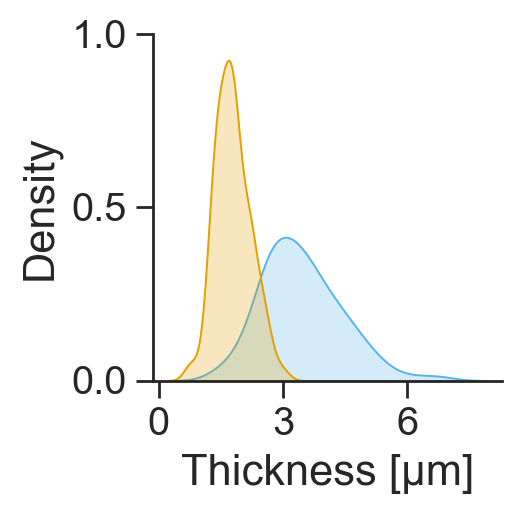

In [72]:
fig, ax = plt.subplots(figsize = (2.25,2.25), dpi = 200)
#11 min
sns.kdeplot(data = h.query("Azide == 'R'"), x = "Length", ax = ax, color = "C0", fill=True, lw = .7)
sns.kdeplot(data = h.query("Azide == 'KR'"), x = "Length", ax = ax, color = "C4", fill=True, lw = .7)
sns.despine()
ax.set(ylabel = "Density", xlabel = "Thickness [µm]", xticks = np.linspace(0, 6, 3), yticks = np.linspace(0, 1, 3))


### Figure S11D

In [73]:
g1 = pd.read_csv("FigureS11D1.csv")
g2 = pd.read_csv("FigureS11D2.csv")
g3 = pd.read_csv("FigureS11D3.csv")
g4 = pd.read_csv("FigureS11D4.csv")

/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_15299/3022676920.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_filtered["Azide"] = i
/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_15299/3022676920.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_filtered["Azide"] = i
/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_15299/3022676920.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

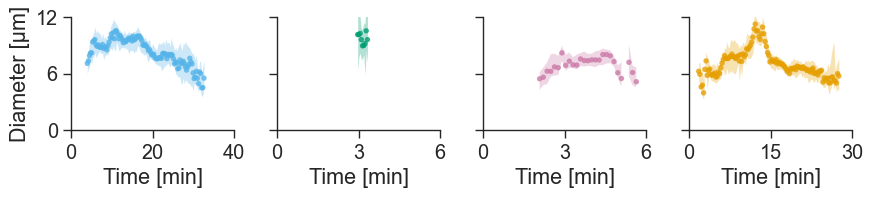

In [93]:
azides = ["R", "G", "C", "KR"]
Colors = ["C0", "C1", "C2", "C4"]
s = []
fig, ax = plt.subplots(figsize=(9, 2.25), dpi=100, nrows=1, ncols=4)

# Define per-panel axis settings
xlims  = [(0, 40), (0, 6), (0, 6), (0, 30)]
ylims  = [(0, 12), (0, 9), (0, 12), (0, 12)]
xticks = [np.linspace(*x, 3) for x in xlims]
yticks = [np.linspace(*y, 3) for y in ylims]

for i, g in enumerate([g1, g2, g3, g4]):
    g_filtered = g.iloc[:-1]
    g_filtered["Azide"] = i
    s.append(g_filtered)

    a = ax[i]

    # Scatter plot
    sns.scatterplot(
        data=g_filtered,
        x="min",
        y="median_diameter",
        color=Colors[i],
        s=15,
        alpha=0.8,
        edgecolor="none",
        ax=a
    )

    # Error band
    a.fill_between(
        g_filtered["min"],
        g_filtered["lower"],
        g_filtered["upper"],
        color=Colors[i],
        alpha=0.3,
        lw=0
    )

    # Axis ranges
    a.set(
        xlim=xlims[i], xticks=xticks[i],
        ylim=ylims[i], yticks=yticks[i]
    )

    # Only label y-axis on first plot
    if i == 0:
        a.set_ylabel("Diameter [µm]")
        
    else:
        a.set_ylabel("")
        a.set_yticklabels([])

    # Remove individual x-labels
    
    a.set_xlabel("Time [min]")

# Aesthetic tweaks
sns.despine(fig, top=True, right=True, left=False)
plt.tight_layout()